In [43]:
import pvlib
import pandas as pd
import matplotlib.pyplot as plt
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

In [44]:
latitude=37.983810 
longitude=23.727539
surface_tilt=0 
surface_azimuth=180
start=2021
end=2021
location=Location(latitude, longitude, tz='Europe/Athens', altitude=100)

In [45]:
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod') 

sapm_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')

module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']

inverter = sapm_inverters['ABB__PVI_10_0_I_OUTD_x_US_208_y__208V_']	#

temperature_model_parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

In [46]:
system=PVSystem(surface_tilt=surface_tilt, surface_azimuth=surface_azimuth,
                module_parameters=module, inverter_parameters=inverter,
                temperature_model_parameters=temperature_model_parameters,
                modules_per_string=20, strings_per_inverter=2
                )
modelchain=ModelChain(system, location)

In [47]:
data=pd.read_csv('pvgis_tmy.csv', index_col=0)
data.index=pd.to_datetime(data.index)

In [48]:
modelchain.run_model(data)
solar_data=modelchain.results.ac
solar_data=pd.DataFrame(solar_data, columns=(['GR_solar_generation']))

solar_data.loc[solar_data['GR_solar_generation'] < 0, 'GR_solar_generation'] = 0
solar_data.to_csv(f'C:/test/solar_data.csv', index_label=['Datetime'])
solar_data.head(20)

,GR_solar_generation
2021-01-01 00:00:00,0.000000
2021-01-01 01:00:00,0.000000
2021-01-01 02:00:00,0.000000
2021-01-01 03:00:00,0.000000
2021-01-01 04:00:00,0.000000
2021-01-01 05:00:00,0.000000
2021-01-01 06:00:00,0.000000
2021-01-01 07:00:00,1216.571044
2021-01-01 08:00:00,2433.829108
2021-01-01 09:00:00,833.745738


<Axes: >

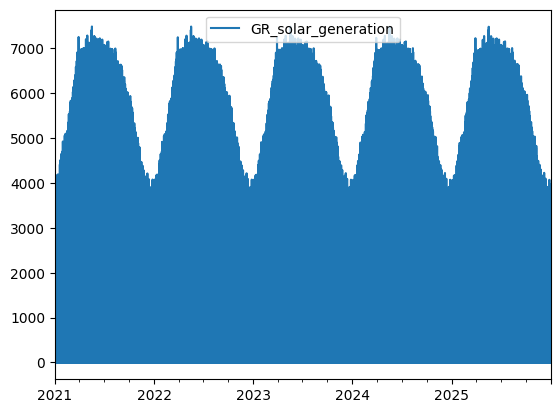

In [49]:
# solar_data['2020-07-23':'2020-07-25'].plot()
solar_data.plot()